<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/Ejercicios_PubChem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios PubChem

# Objetivos


---
+ Familiarizarse con el uso de `PUG-REST` para acceder a información disponible en PubChem mediante programación.  

* Identificar el tipo de información disponible y los diferentes tipos de búsqueda que pueden realizarse, de tal manera que la búsqueda de información se realice en forma sencilla y eficiente.

* Ejemplificar la adquisición de diferente tipo de información disponible en PubChem.

#Formato de búsqueda

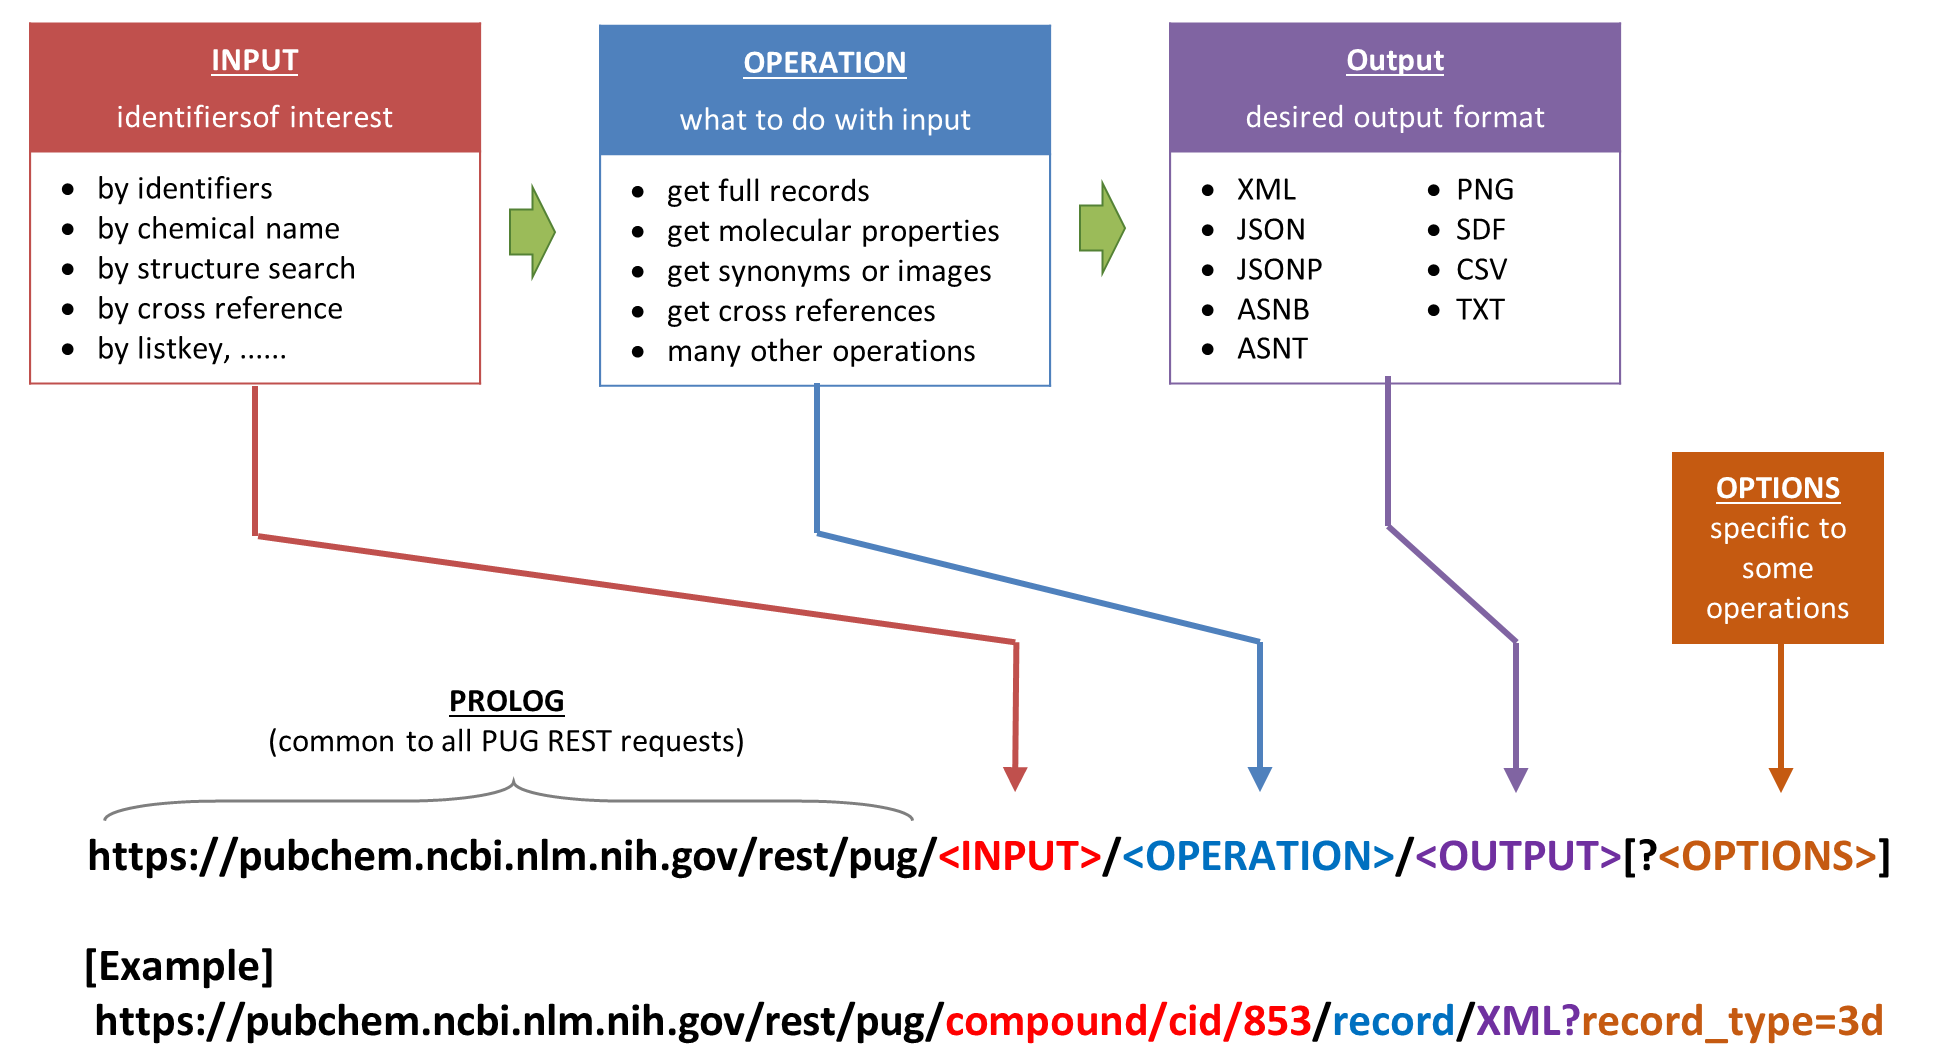

**Figura 1.** Construcción de búsquedas en PubChem. Figura recuperada de [*Nucleic Acids Res.* 2015;43(W1):W605-W611](https://academic.oup.com/nar/article/43/W1/W605/2467896?login=false)

**Para saber más, consulte las siguientes referencias:**
* Documentación de PugRest: https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest#section=Input
* PUG-REST Help: http://pubchem.ncbi.nlm.nih.gov/pug_rest/PUG_REST.html
* PUG-REST Tutorial: http://pubchem.ncbi.nlm.nih.gov/pug_rest/PUG_REST_Tutorial.html


# Pregunta 1
 1.1 Identifique compuestos que contienen la palabra “benzylpiperidine” como parte de su nombre. Para realizar esta búsqueda se pueden establecer los siguientes criterios:


* Input =  "compund/name/{name}"
* Operation =  "cids"
* Output =  "txt"
* Options= ?name_type=word


a) Indique la URL para realizar esta búsqueda

b) Utilice la función len para saber cuántos compuestos se obtienen con esta búsqueda e indique el número obtenido

c) Corrobore esta información entrando a Entrez (https://www.ncbi.nlm.nih.gov/pccompound/) en búsqueda avanzada y usando el índice [synonym]. Muestre una captura de pantalla de su búsqueda.


In [ ]:
!pip install rdkit
!pip install requests


In [ ]:

import requests
# Define the constants
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
name = "benzylpiperidine"

# Construct the URL for the request
url = prolog + "/compound/name/" + name + "/cids/txt" + "?name_type=word"

# Send the request and get the response
r = requests.get(url)

# Check if the request was successful
if r.status_code == 200:
    # Extract the list of CIDs from the response
    cids = r.text.split()

    # Print the length of the list
    print("RESPUESTA 1.A - url utilizada:", url)
    print("RESPUESTA 1.B - numero de matchs con búsqueda:", len(cids))

else:
    print("Error:", r.status_code)

RESPUESTA 1.A - url utilizada: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/benzylpiperidine/cids/txt?name_type=word
RESPUESTA 1.B - numero de matchs con búsqueda: 1714


RESPUESTA 1.C : https://www.ncbi.nlm.nih.gov/pccompound/?term=%22benzylpiperidine%22%5Bsynonym%5D

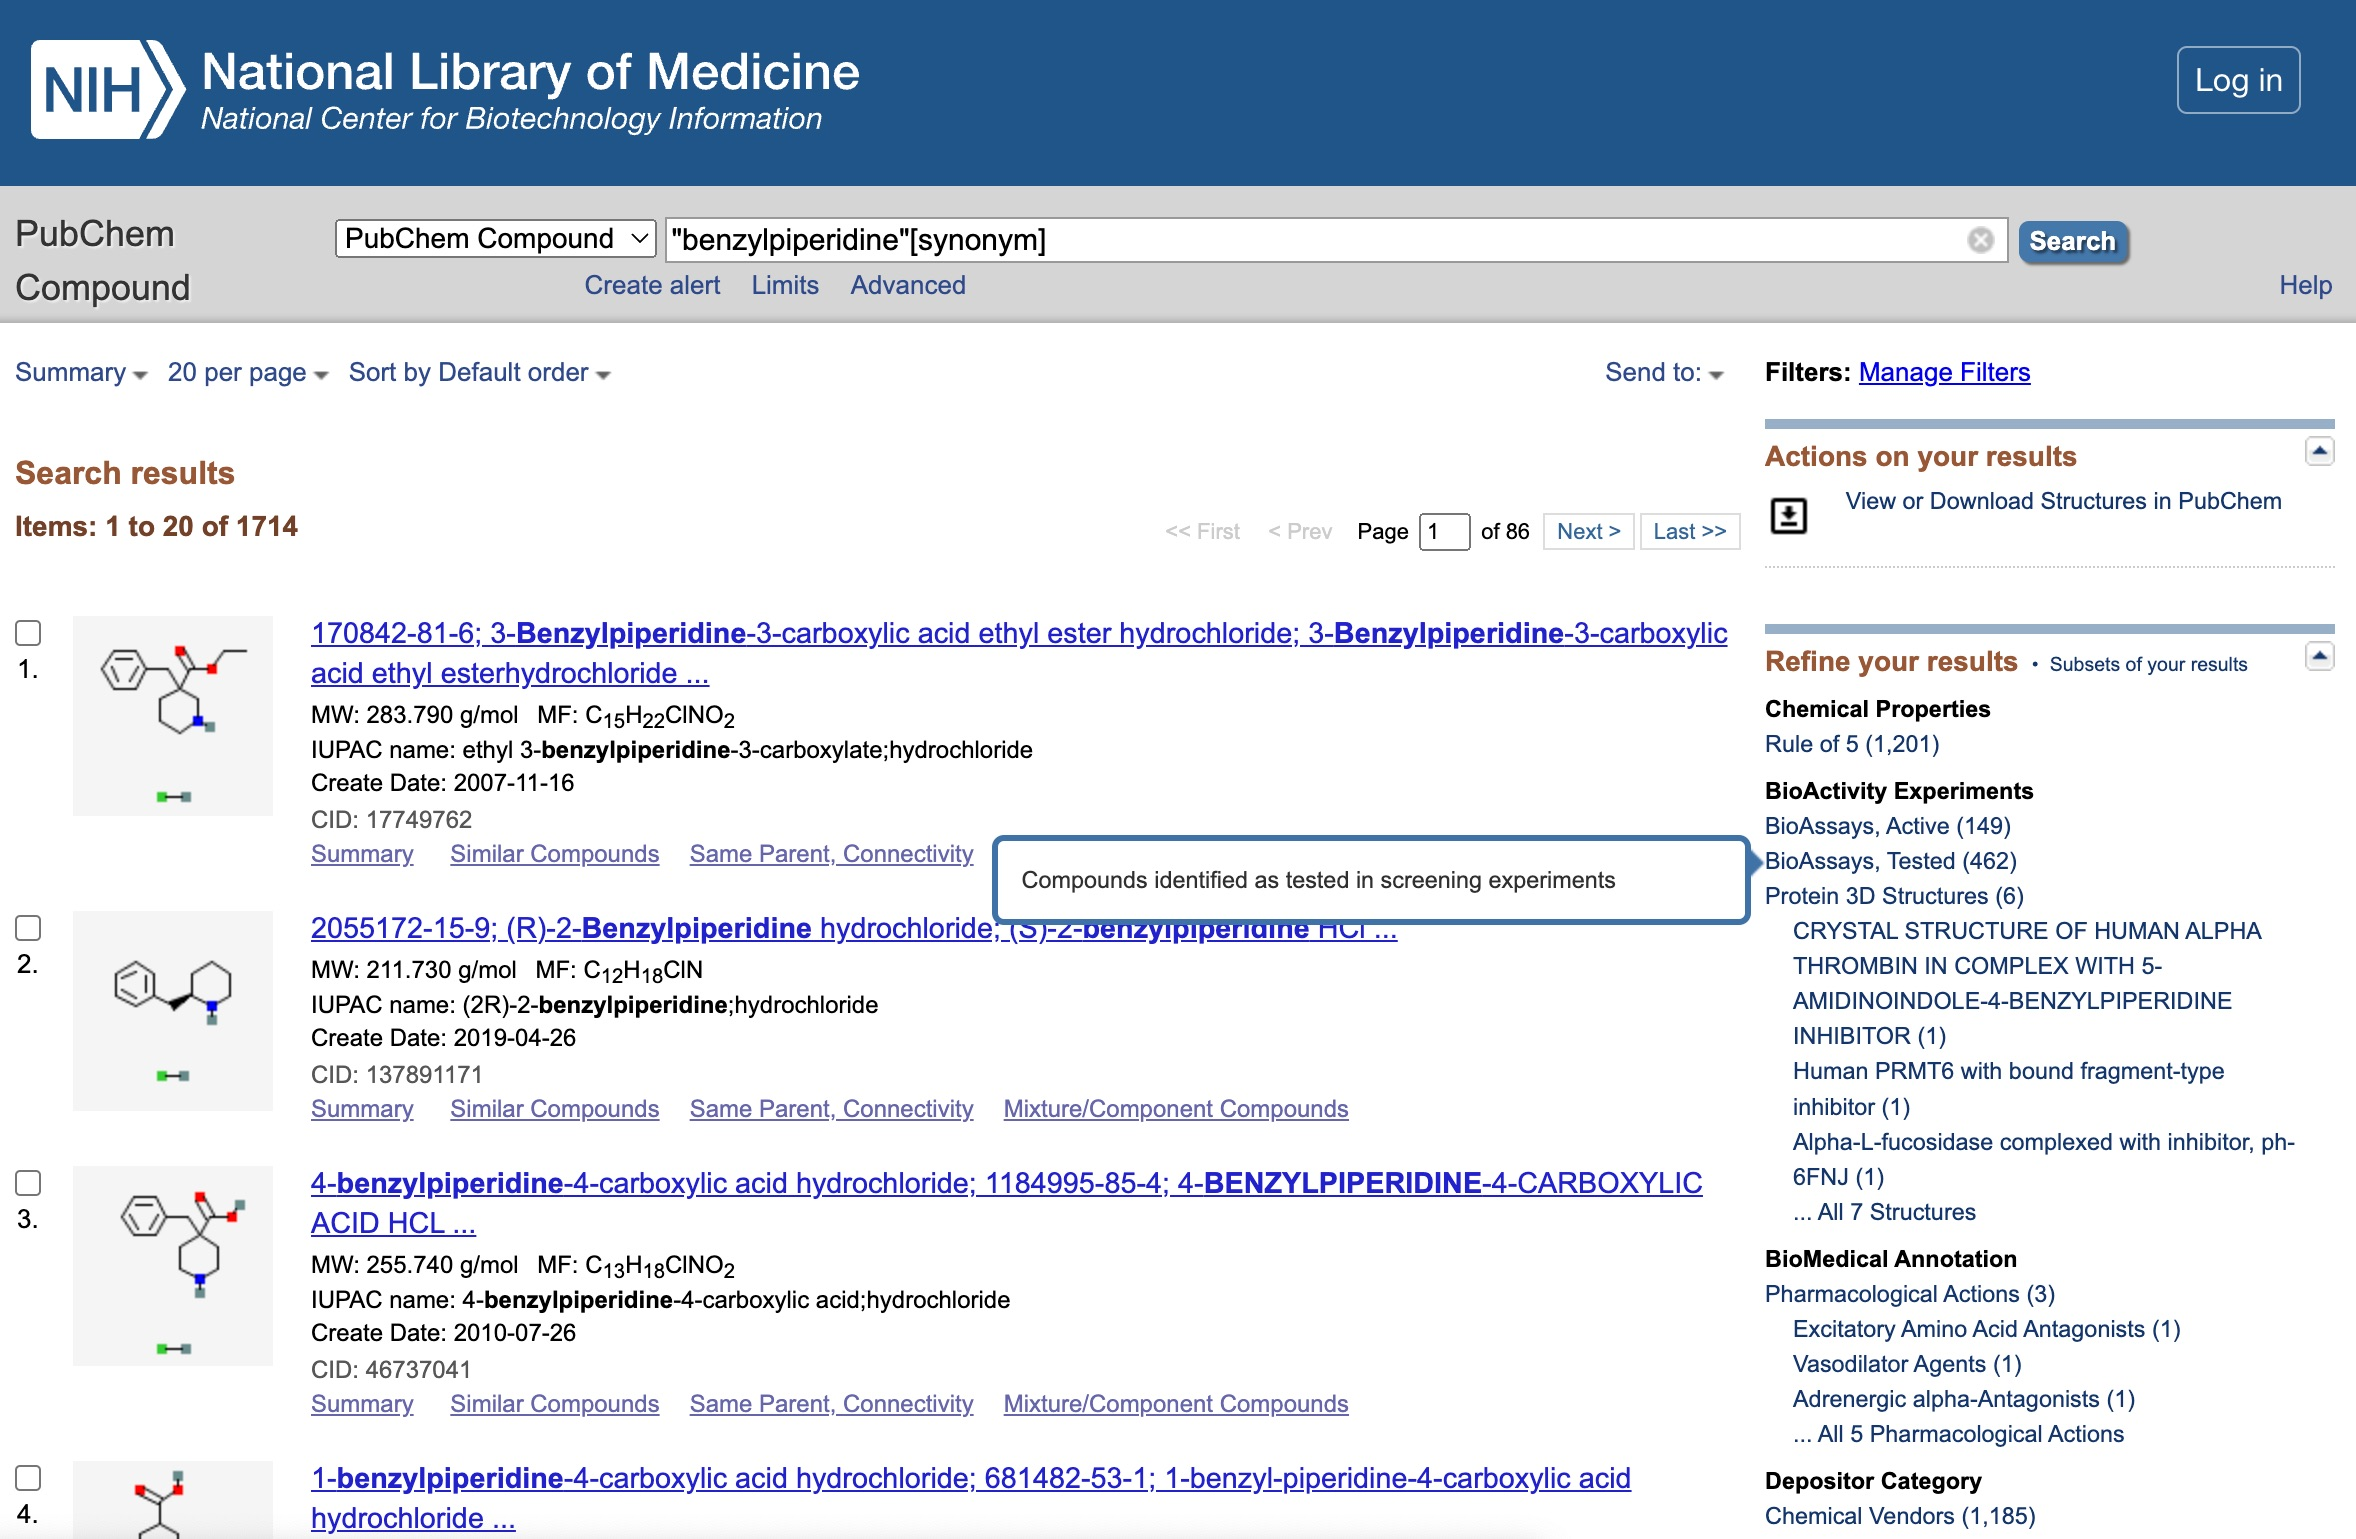

## Pregunta 2

Obtenga un archivo csv con los SMILES canónicos de al menos 5 compuestos identificados en el punto anterior. Adicionalmente, puede agregar otras propiedades (revisar el siguiente link para seleccionar propiedades moleculares https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest#section=Compound-Property-Tables)

a) Desglose su búsqueda e indique el input, operation y output

b) Indique la URL para realizar esta búsqueda:


In [ ]:
import pandas as pd
import requests
import io
import random

# Retrieve randomly 5 numbers from the previous query
random_cids = random.sample(cids, 5)

# Convert the array to a comma-separated string for the URL
random_cids_string = ','.join(random_cids)

# 1 A Define other parts of the URL
prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
input_path = '/compound/cid/'
operation = '/property/MolecularFormula,CanonicalSMILES,MolecularWeight,XLogP,TPSA,HBondDonorCount,HBondAcceptorCount,RotatableBondCount'
output = '/CSV'

# Construct the URL
url = f"{prolog}{input_path}{random_cids_string}{operation}{output}"

# Make the request
r = requests.get(url)

df = pd.read_csv(io.StringIO(r.text))
print("RESPUESTA 2.B:", url)

df


RESPUESTA 2.B: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/23153398,4147890,124066857,42693686,71778340/property/MolecularFormula,CanonicalSMILES,MolecularWeight,XLogP,TPSA,HBondDonorCount,HBondAcceptorCount,RotatableBondCount/CSV


,CID,MolecularFormula,CanonicalSMILES,MolecularWeight,XLogP,TPSA,HBondDonorCount,HBondAcceptorCount,RotatableBondCount
0,23153398,C15H24Cl2N2,C1CN(C1)C2CCN(CC2)CC3=CC=CC=C3.Cl.Cl,303.3,NaN,6.5,2,2,3
1,4147890,C30H32N2O3,CN1C(C(C2=CC=CC=C2C1=O)C(=O)N3CCC(CC3)CC4=CC=C...,468.6,4.8,49.8,0,3,5
2,124066857,C20H28N2O3,COCC1C(CCC(=O)N1)C(=O)N2CCC(CC2)CC3=CC=CC=C3,344.4,1.7,58.6,1,3,5
3,42693686,C33H41N3O3S,C1CN(CCC1CC2=CC=CC=C2)C(=O)C3CCN(CC3)C4CCN(CC4...,559.8,5.6,69.3,0,5,6
4,71778340,C18H21N3O3,CN1C(=O)C(=CNC1=O)C(=O)N2CCC(CC2)CC3=CC=CC=C3,327.4,1.6,69.7,1,3,3


## Pregunta 3

Busque compuestos con similitud mayor a 85% del siguiente SMILES: CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC(=C(C=C25)F)Cl   

a) Desglose su búsqueda e indique el input, operation y output.

b) Indique la URL para realizar esta búsqueda.

c) Visualice los compuestos obtenidos.


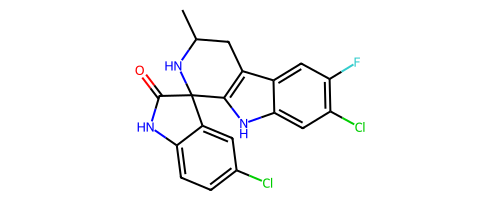

In [ ]:
## See query:
query1 = [Chem.MolFromSmiles('CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC(=C(C=C25)F)Cl')]
img = Draw.MolsToGridImage(query, molsPerRow=1, subImgSize=(500, 200))
display.display(img)

RESPUESTA 3.A

In [ ]:
import requests
def find_similar_compounds(smiles_query, threshold=85, n_records=10):

  prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
  input = '/smiles/' + smiles_query
  operation = '/compound/fastsimilarity_2d'
  output = '/cids/JSON'
  parameters = '?Threshold='+ str(threshold) + '&MaxRecords='+ str(n_records)

  # Make the request to the REST/PUG API.
  url3 = prolog + operation + input + output + parameters
  response = requests.get(url3)

  # Check if the request was successful (status code 200).
  if response.status_code == 200:
      # Parse the JSON response and extract CIDs.
      json_data = response.json()
      cids = json_data['IdentifierList']['CID']
      print("RESPUESTA 3.A substructure cids:",cids)
      print("RESPUESTA 3.B:",url3)
      return cids
  else:
      # Print an error message if the request was not successful.
      print(f"Error: {response.status_code}")

# STRUCTURE Query:
smiles = "CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC(=C(C=C25)F)Cl"
similar_compounds = find_similar_compounds(smiles_query=smiles)



RESPUESTA 3.A substructure cids: [44469321, 44828492, 3995234, 11069554, 11761349, 15697379, 44251608, 44333692, 46179404, 609412]
RESPUESTA 3.B: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/fastsimilarity_2d/smiles/CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC(=C(C=C25)F)Cl/cids/JSON?Threshold=85&MaxRecords=10


In [ ]:
print(similar_compounds)

[44469321, 44828492, 134821714, 16752691, 4897400, 609412, 134821715, 121424047, 46867927, 46867792]


RESPUESTA 3.C

,CID,SMILES
0,44469321,CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC(=...
1,44828492,CCC1=C(NC2=C1C=C(C=C2)Cl)C(=O)NCCC3=CC=C(C=C3)...
2,3995234,CCCCCCN(CCCCCC)C(=O)CC1=C(NC2=C1C=C(C=C2)Cl)C3...
3,11069554,CCCCN1C(=O)C2CC3=C(C(N2C1=O)C4=CC=C(C=C4)Cl)NC...
4,11761349,CCCCN1C(=O)C2CC3=C(C(N2C1=O)C4=CC(=CC=C4)Cl)NC...
5,15697379,C1CCN(C1)CC2C3=C(CCN2C(=O)CC4=CC(=C(C=C4)Cl)Cl...
6,44251608,CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC(=...
7,44333692,CN1C2=C(C=C(C=C2)Cl)C(=C1C3=CC=C(C=C3)Cl)CCC(=...
8,46179404,CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC=C...
9,609412,C1CC(C2=C(C1)C3=C(N2)C=CC(=C3)Cl)C(=O)NCC(=O)N


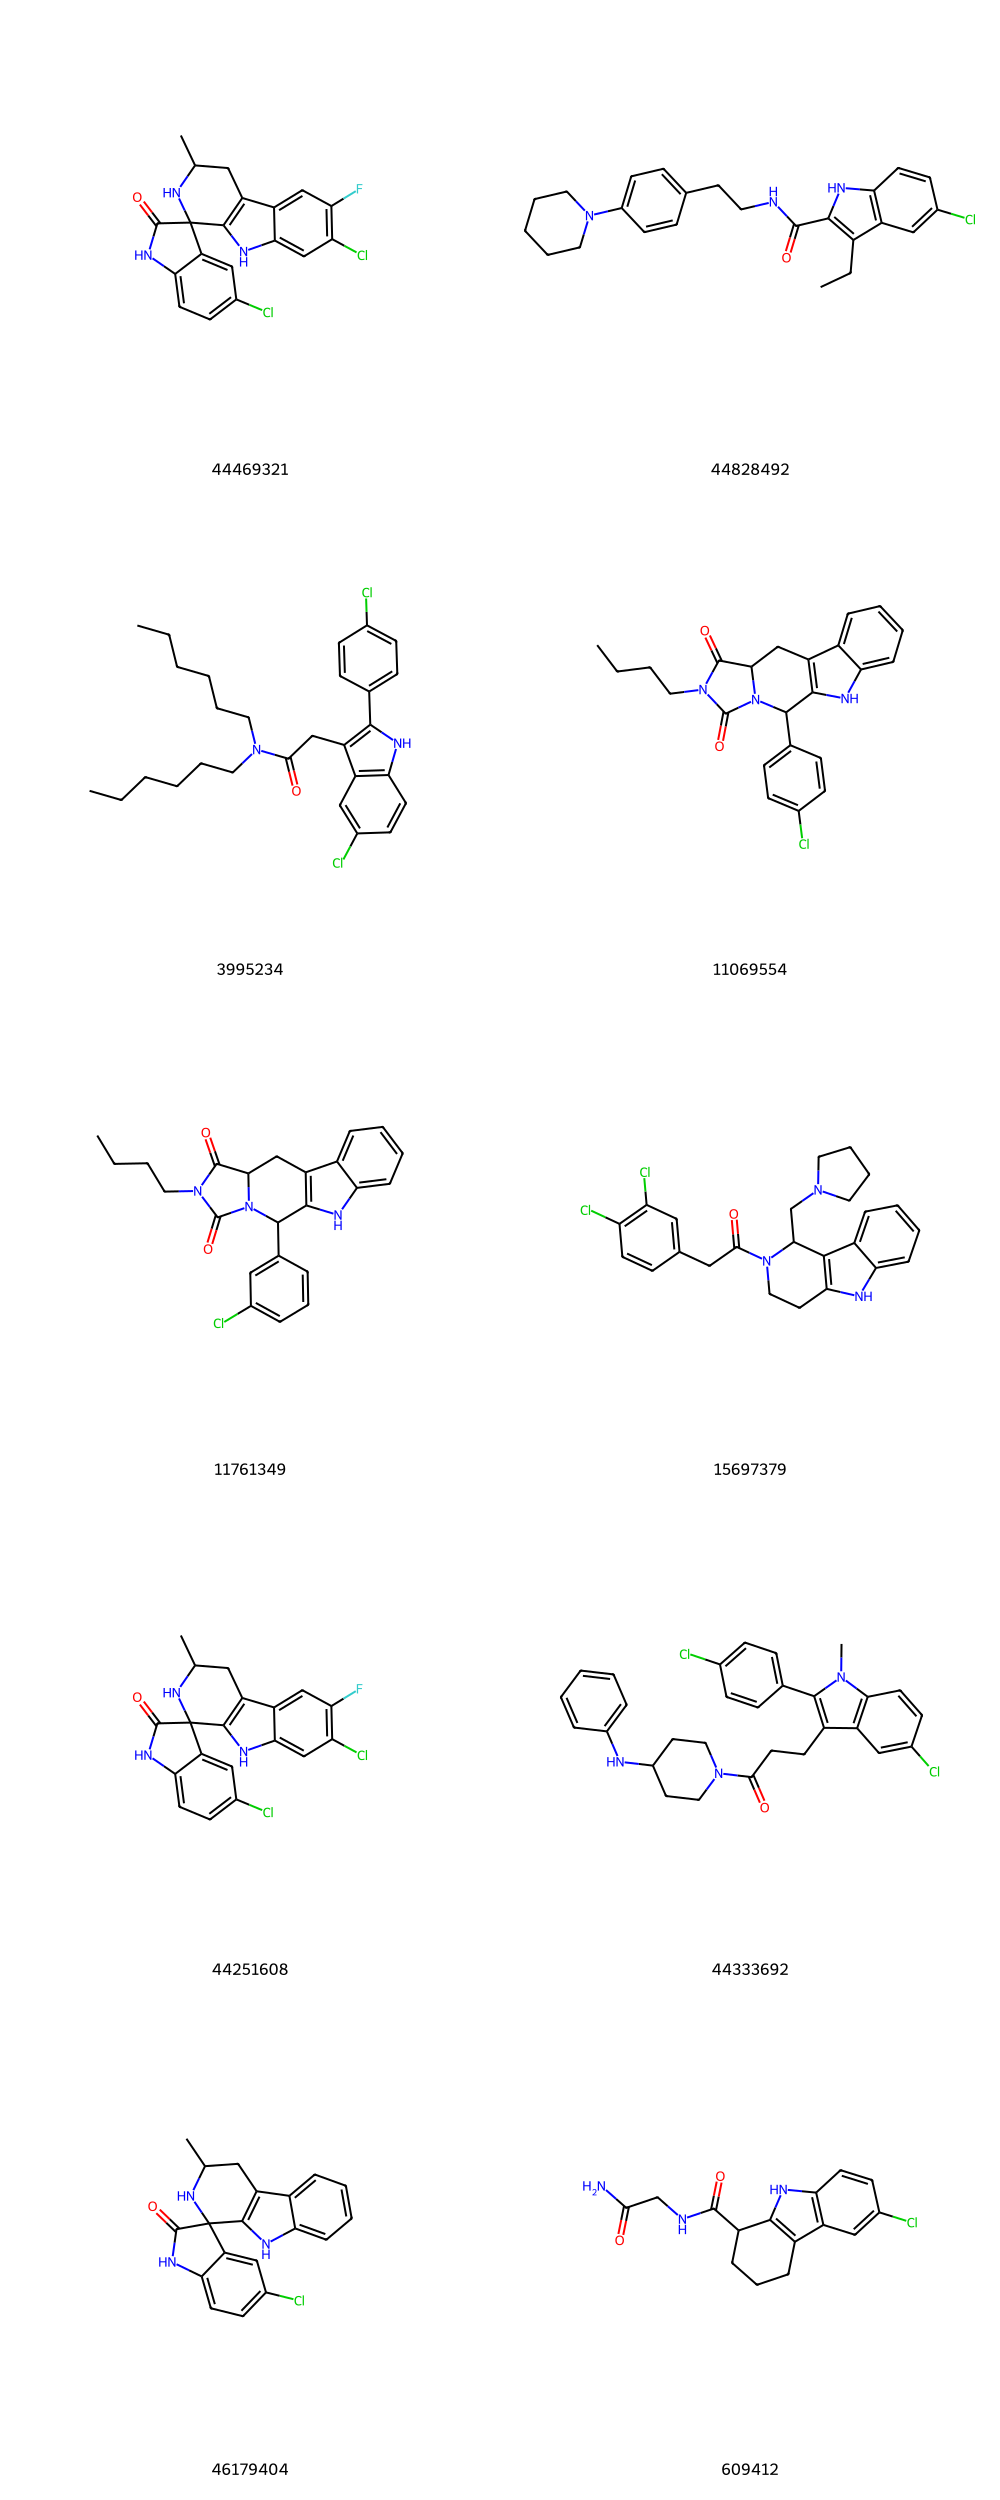

In [ ]:

# Function to get SMILES from PubChem
def get_smiles(cid):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/CanonicalSMILES/JSON"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        smiles = data['PropertyTable']['Properties'][0]['CanonicalSMILES']
        return smiles
    else:
        print(f"Error for CID {cid}: {response.status_code}")
        return None

 # Replace with your actual list of CIDs
Cids = similar_compounds

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=["CID", "SMILES"])

# Make requests for each CID
for CID in Cids:
    smiles = get_smiles(CID)

    if smiles:
        # Add data to the DataFrame
        result_df.loc[len(result_df)] = {"CID": CID, "SMILES": smiles}

# Display the DataFrame
display.display(result_df)

# Draw molecules
molecules = [Chem.MolFromSmiles(smiles) for smiles in result_df["SMILES"]]
legends = [str(cid) for cid in result_df["CID"]]
img = Draw.MolsToGridImage(molecules, molsPerRow=2, subImgSize=(500, 500), legends=legends)
display.display(img)


## Pregunta 4

Realice una búsqueda de compuestos que contengan como subestructura una de las estructuras privilegiadas definida en los ejercicios de la sesión 1.

a) Ingrese al servidor web de PubChem (https://pubchem.ncbi.nlm.nih.gov/) y realice una búsqueda por subestructura de alguna estructura privilegiada definida en los ejercicios de la sesión 1. En caso de filtrarse compuestos erróneos, corregir el SMARTS de consulta.

b) Realice esta misma búsqueda mediante PuG-Rest y desglose su búsqueda. Indique el input, operation y output.

c) Indique la URL para realizar esta búsqueda.

d) Muestre ejemplos de los compuestos identificados-


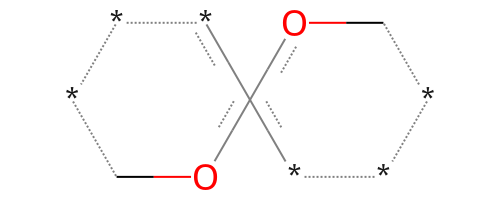

In [ ]:
import random
import requests
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
import IPython.display as display

## Privileged Structure searched:
query = [Chem.MolFromSmarts('[*]~1~[*]~[*]C2([*]~[*]~[*]~[#6]-[#8]2)[#8]-[#6]~1')]
img = Draw.MolsToGridImage(query, molsPerRow=1, subImgSize=(500, 200))
display.display(img)


RESPUESTA 1.4.A

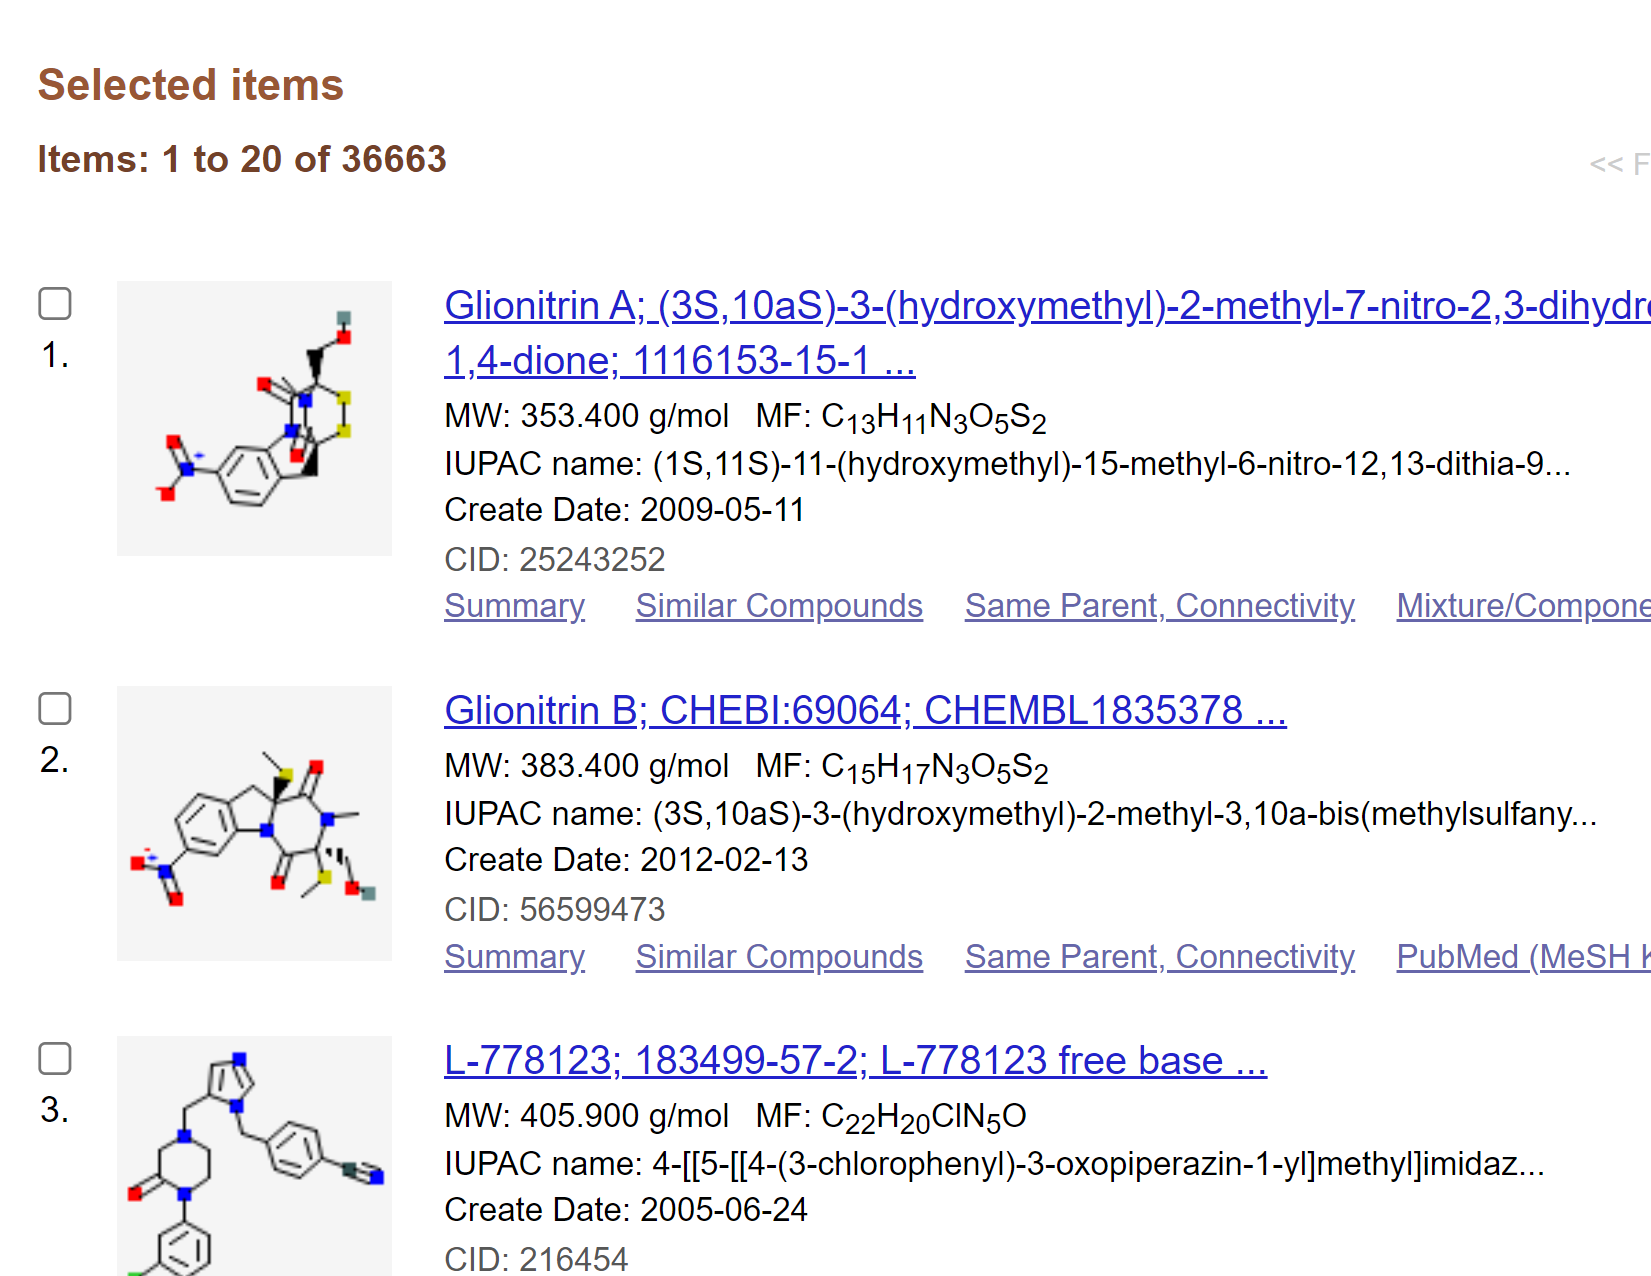

 RESPUESTA 1.4.B

In [ ]:
query='[*]~1~[*]~[*]C2([*]~[*]~[*]~[#6]-[#8]2)[#8]-[#6]~1'
import urllib.parse
query_url= urllib.parse.quote(query)
query_url

'%5B%2A%5D~1~%5B%2A%5D~%5B%2A%5DC2%28%5B%2A%5D~%5B%2A%5D~%5B%2A%5D~%5B%236%5D-%5B%238%5D2%29%5B%238%5D-%5B%236%5D~1'

In [ ]:
prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'

input= '/smarts/'+ query_url
operation= '/compound/fastsubstructure'
output='/cids/txt'
url4= prolog + operation + input+ output

r=requests.post(url4)
x=r.text.split()
print("# CIDs of molecules with found Substructure:", len(x))
print("RESPUESTA 4.C:",url4)

# CIDs of molecules with found Substructure: 20293
RESPUESTA 4.C: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/fastsubstructure/smarts/%5B%2A%5D~1~%5B%2A%5D~%5B%2A%5DC2%28%5B%2A%5D~%5B%2A%5D~%5B%2A%5D~%5B%236%5D-%5B%238%5D2%29%5B%238%5D-%5B%236%5D~1/cids/txt


RESPUESTA 4.D

,CID,SMILES
0,101183615,CC[Si](CC)(CC)OCC(C)C(=C)CC1CC(CC2(O1)CC(CC(O2...
1,89849350,CC1=CC2(C=C(C3CC(=O)C(=CC3O2)C)COCC4=C(C=CC=C4...
2,24788903,CC1CCC2(CC3CC(O2)CC=C(C(C(C=CC=C4COC5C4(C(=CC(...
3,162821164,CCC(C)C1C(C=CC2(O1)CC3CC(O2)CC=C(C(C(C=CC=C4CO...
4,159342540,CC1=C2C(=CC=C1)CC3CCCC4C3(O2)OC5=C(C4)C=CC=C5P...
5,134986262,C1CCOC2(C1)CC(=O)CC(O2)C3=CC=CC=C3
6,162947620,CCC1C2C(C(CCC(C=CC=CCC(C(C(C(=O)C(C(C(C(=O)C(C...
7,124375553,CC1=CC2=C(C=C1)OC3(C=C2)N(C(=O)C4=CC=CC=C4O3)C
8,46849376,CC1(CCC(C23C1C(C4(C56C2CCC(C5OC(O4)C7=CC(=C(C=...
9,163112430,CC1CCC2(CC3CC(O2)CC=C(C(C(C=CC=C(C4=C(C=C(C(=C...


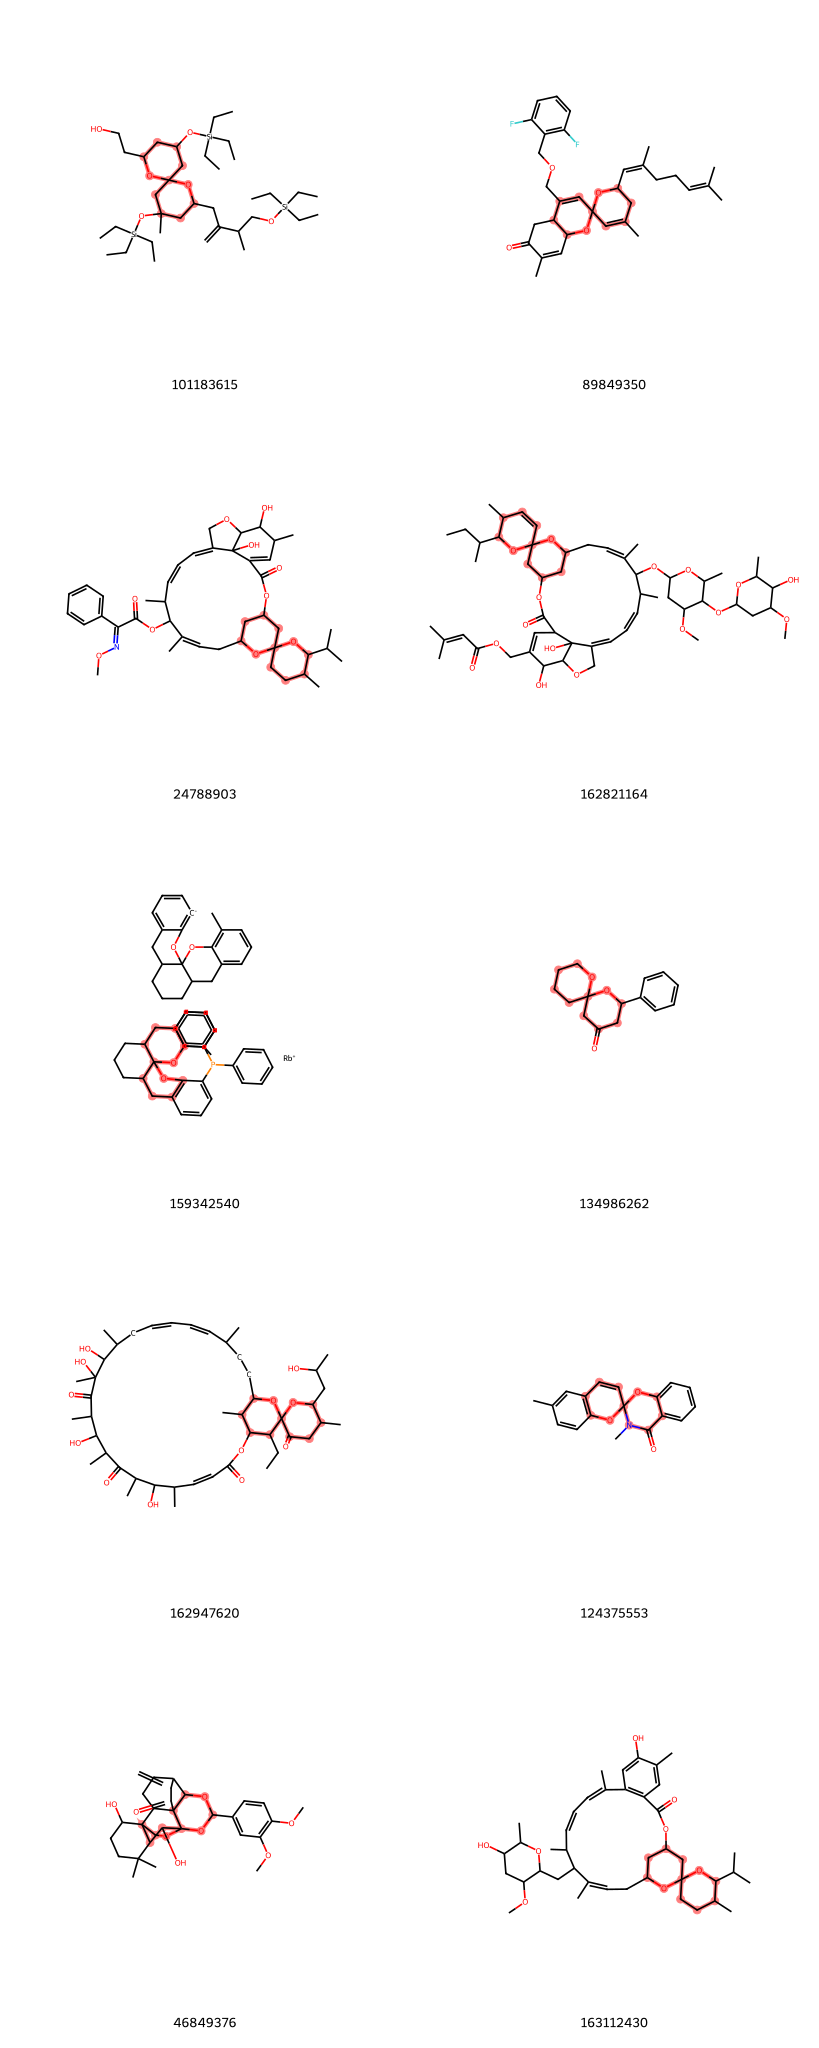

In [ ]:


 # Replace with your actual list of CIDs
random_cids = random.sample(x, 10)

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=["CID", "SMILES"])

# Make requests for each CID
for CID in random_cids:
    smiles = get_smiles(CID)

    if smiles:
        # Add data to the DataFrame
        result_df.loc[len(result_df)] = {"CID": CID, "SMILES": smiles}

# Display the DataFrame
display.display(result_df)

# Draw molecules
query_mol = Chem.MolFromSmarts(query)
molecules = [Chem.MolFromSmiles(smiles) for smiles in result_df["SMILES"]]
legends = [str(cid) for cid in result_df["CID"]]
img = Draw.MolsToGridImage(molecules, molsPerRow=2, subImgSize=(500, 500), legends=legends, highlightAtomLists=[ mol.GetSubstructMatch(query_mol) for mol in molecules], useSVG=True)
display.display(img)

